# Gen3 Test Analysis
The purpose of this notebook is to:
1. Use gen3 api key to pull clinical data / metadata
1. Pull data files
1. Parse metadata to dataframe
1. Create graph with basic stats
1. Run samtools on basic bam file

In [ ]:
%%bash
git clone https://github.com/AustralianBioCommons/gen3-metadata.git
pip install -r gen3-metadata/requirements.txt
pip install -e gen3-metadata/

In [ ]:
import sys
import os

# Add the path to the cloned repository
repo_path = "gen3-metadata/src"
sys.path.append(repo_path)

# Verify that the path is added
print(sys.path)

In [ ]:
import os
from gen3_metadata.gen3_metadata_parser import Gen3MetadataParser

key_file = os.getenv('credentials_path')
gen3metadata = Gen3MetadataParser(key_file)
gen3metadata.authenticate()


gen3metadata.fetch_data("program1", "AusDiab_Simulated", "subject")
gen3metadata.fetch_data("program1", "AusDiab_Simulated", "demographic")
gen3metadata.fetch_data("program1", "AusDiab_Simulated", "medical_history")

gen3metadata.data_to_pd()

In [16]:
medical_history_pd =gen3metadata.data_store_pd['program1/AusDiab_Simulated/medical_history']
medical_history_pd

,project_id,submitter_id,atrial_fibrillation,cabg,cvd_death,cvd_death_ICD10,cvd_family_history,cvd_non_fatal_10_year,cvd_non_fatal_10_year_ICD10,cvd_reported,...,hypertension_measured_ICD10,hypertension_self_reported,mhx_pad,os_event,os_time,premature_cvd_family_history,stent,timepoints,id,type
0,program1-AusDiab_Simulated,medical_history_cbae3a67f4,yes,no,no,7d1beda07d,yes,no,ca179cd59a,yes,...,1d9f1a9360,yes,yes,dead,26,no,yes,[{'node_id': '872a69f4-0d76-4cdd-a73e-6dd4c97c...,000c2403-ddf3-40bc-bbba-9a87014b4d8a,medical_history
1,program1-AusDiab_Simulated,medical_history_00ae7e7bff,no,yes,no,a3de8bd16e,no,yes,c3aed5faf5,yes,...,c9f4748186,yes,no,censored,50,yes,yes,[{'node_id': 'd2e00e2f-b1bf-4971-bcc4-cd4811ea...,0029a7b3-d5bc-4dad-bc0a-73442ece96c1,medical_history
2,program1-AusDiab_Simulated,medical_history_e41ee70259,yes,no,no,0c5f83433f,no,no,62e59684fb,yes,...,858d1731af,yes,no,dead,13,yes,yes,[{'node_id': '27b55f18-9cae-411f-a490-9250e87d...,0099a61d-e9f2-4ab9-ab87-4dace8dca1e7,medical_history
3,program1-AusDiab_Simulated,medical_history_13c19ffbd8,no,yes,yes,fa998874d4,no,yes,2847921ec3,yes,...,9a6b49be2c,no,yes,dead,48,yes,yes,[{'node_id': 'a08ddacc-d315-488b-97e8-269bd454...,00a5071a-abb7-4c35-8ecf-a7d375782100,medical_history
4,program1-AusDiab_Simulated,medical_history_e95d990e1f,no,no,no,47b9e4a404,yes,no,fc2aa16c2b,yes,...,a24b489971,yes,yes,censored,71,yes,yes,[{'node_id': 'f92dce24-53e7-41f4-b471-5b261372...,00ae120f-2b8e-45be-bc55-3f6146579ebe,medical_history
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,program1-AusDiab_Simulated,medical_history_c65fb27fb2,no,yes,yes,63ce31d734,no,no,616c9f5674,yes,...,c0eb693305,no,yes,dead,98,no,no,[{'node_id': '9e066cf9-5a5b-4e7d-827c-acaa471b...,fe1e69cd-2d0e-411a-8a07-8a42dbeb3dde,medical_history
1096,program1-AusDiab_Simulated,medical_history_401e7a863c,yes,no,yes,c489b32ff5,yes,yes,5d6cd83082,no,...,7b3843c4bf,yes,yes,censored,64,yes,yes,[{'node_id': '072889b3-65e9-46b5-a72f-de325165...,fe55fd9d-49a5-47ed-90d7-1332e89e2a75,medical_history
1097,program1-AusDiab_Simulated,medical_history_44666dc34f,no,yes,no,2dfb9108bd,yes,no,299fdf3d26,no,...,ccf25142a1,no,yes,dead,33,yes,no,[{'node_id': '4768805e-7b1b-43b5-9883-c1069a0c...,fe99f9da-e088-4493-84f2-ef71213526c5,medical_history
1098,program1-AusDiab_Simulated,medical_history_f7b2e6b6c9,yes,yes,yes,7e46383f2c,yes,no,a4dd0760fd,no,...,4545aa175a,yes,yes,censored,97,no,yes,[{'node_id': 'e7cf1289-caa1-462d-b218-6d627f09...,fee5b09b-4b76-4490-8c25-1bdc08eae709,medical_history


In [18]:
medical_history_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   project_id                    1100 non-null   object
 1   submitter_id                  1100 non-null   object
 2   atrial_fibrillation           1100 non-null   object
 3   cabg                          1100 non-null   object
 4   cvd_death                     1100 non-null   object
 5   cvd_death_ICD10               1100 non-null   object
 6   cvd_family_history            1100 non-null   object
 7   cvd_non_fatal_10_year         1100 non-null   object
 8   cvd_non_fatal_10_year_ICD10   1100 non-null   object
 9   cvd_reported                  1100 non-null   object
 10  cvd_reported_ICD10            1100 non-null   object
 11  cvd_self_reported             1100 non-null   object
 12  date_death                    1100 non-null   object
 13  diabetes_reported 

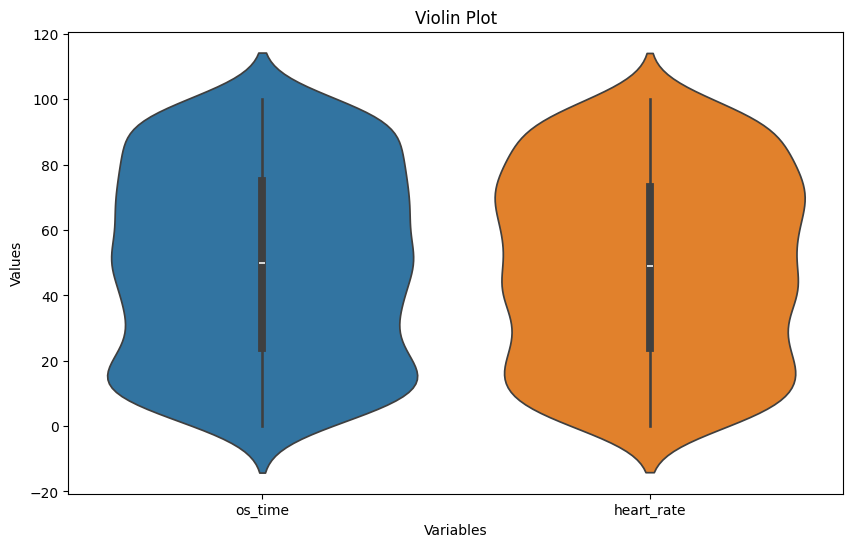

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Violin Plot'}, xlabel='Variables', ylabel='Values'>)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_violin_plot(data, variables):
    """
    Create a violin plot for the specified variables from a pandas DataFrame.

    Parameters:
    - data: pandas DataFrame containing the data.
    - variables: list of column names to plot.

    Returns:
    - A matplotlib figure and axis containing the violin plot.
    """
    if not isinstance(variables, list):
        variables = [variables]

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create the violin plot
    sns.violinplot(data=data[variables], ax=ax)

    # Set plot title and labels
    ax.set_title('Violin Plot')
    ax.set_ylabel('Values')
    ax.set_xlabel('Variables')

    # Show the plot
    plt.show()

    return fig, ax

# Example usage
create_violin_plot(medical_history_pd, ['os_time', 'heart_rate'])


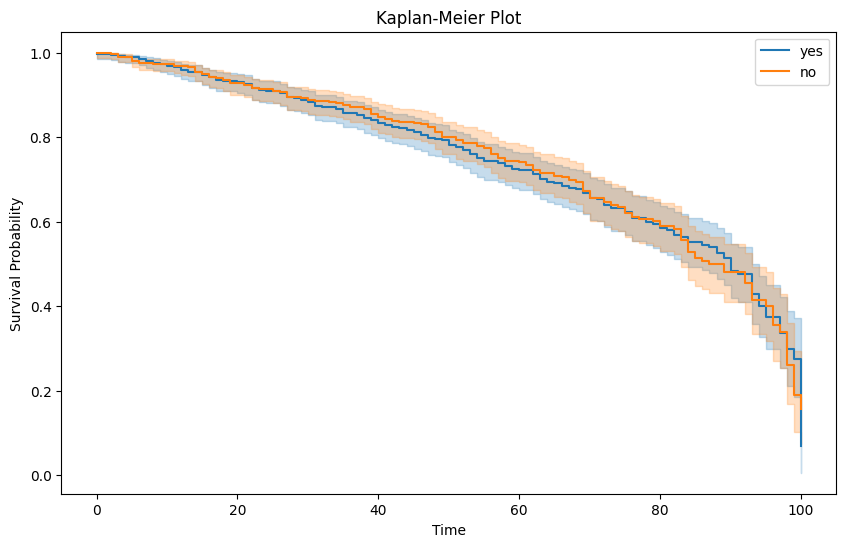

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Kaplan-Meier Plot'}, xlabel='Time', ylabel='Survival Probability'>)

In [22]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

def create_kaplan_meier_plot(data, time_col, event_col, category_col):
    """
    Create a Kaplan-Meier plot for the specified time, event, and category columns from a pandas DataFrame.

    Parameters:
    - data: pandas DataFrame containing the data.
    - time_col: column name for the time variable.
    - event_col: column name for the event variable (1 if event occurred, 0 otherwise).
    - category_col: column name for the categorical variable to split the data.

    Returns:
    - A matplotlib figure and axis containing the Kaplan-Meier plot.
    """
    kmf = KaplanMeierFitter()

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Iterate over each category and fit the Kaplan-Meier estimator
    for category in data[category_col].unique():
        category_data = data[data[category_col] == category]
        kmf.fit(durations=category_data[time_col], event_observed=category_data[event_col], label=str(category))
        kmf.plot(ax=ax)

    # Set plot title and labels
    ax.set_title('Kaplan-Meier Plot')
    ax.set_ylabel('Survival Probability')
    ax.set_xlabel('Time')

    # Show the plot
    plt.show()

    return fig, ax

def convert_os_event_to_numeric(data, event_col):
    """
    Convert the os_event column to numeric values for Kaplan-Meier analysis.

    Parameters:
    - data: pandas DataFrame containing the data.
    - event_col: column name for the event variable.

    Returns:
    - A pandas DataFrame with the event column converted to numeric values.
    """
    # Define a mapping for the event values
    event_mapping = {'dead': 1, 'alive': 0, 'censored': 0}

    # Apply the mapping to the event column
    data[event_col] = data[event_col].map(event_mapping)

    return data

# Convert the os_event column in the medical_history_pd DataFrame
medical_history_pd_km = convert_os_event_to_numeric(medical_history_pd, 'os_event')

# Example usage
create_kaplan_meier_plot(medical_history_pd_km, 'os_time', 'os_event', 'hypertension_self_reported')
